In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

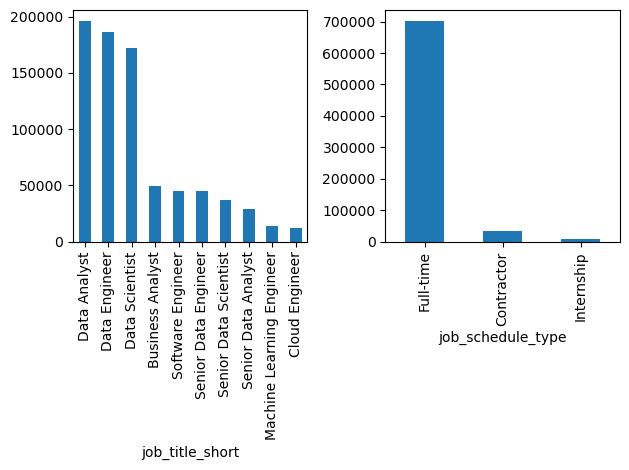

In [ ]:
fig, ax = plt.subplots(1, 2)

# Se llaman 'ax' especificando el indice
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

# Se modifica cualquier caracteristica de las figuras especificando 'fig'

fig.tight_layout() #Ajusta las graficas para evitar overlap

In [9]:
df_exploded = df.copy()
df_exploded = df_exploded.explode('job_skills')
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count', ascending=False, inplace= True)
df_skills_count

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [10]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

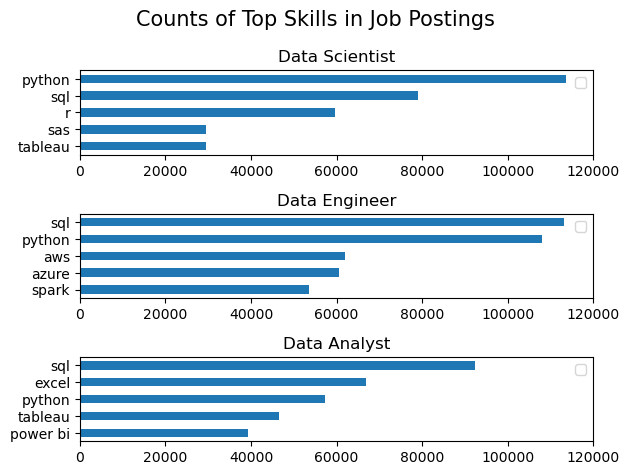

In [ ]:
#GRAFICA CON PANDAS 
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skills_count' , ax=ax[i], title=job_title)
    ax[i].invert_yaxis()  #Invierte los valores
    ax[i].legend('')           
    ax[i].set_ylabel('')       #Nombre o no del eje y
    ax[i].set_xlim(0, 120000)  #Establece la escala del eje para todas las graficas

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15) #Coloca un titulo en la parte superior
fig.tight_layout()


In [25]:
# Create a subplot with 2 rows and 1 column:
# In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
# In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
# Use tight_layout() to adjust the spacing between subplots.

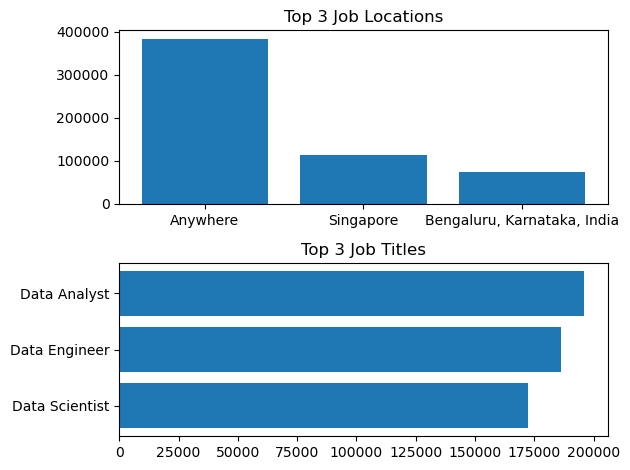

In [ ]:
# GRAFICA CON MATPLOTLIB CODE

fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df_exploded['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

In [ ]:
# Create a subplot with 2 rows and 2 columns:
# In each subplot, plot a bar chart of the top 3 job titles by the number
#  of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
# Use fig.tight_layout() to adjust the spacing between subplots.

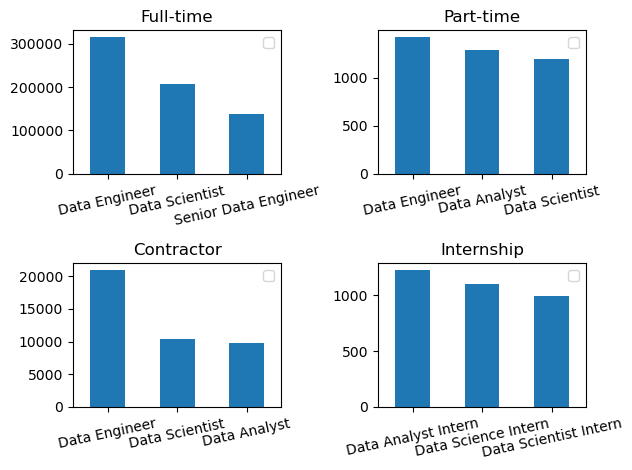

In [105]:
df_type = df_exploded.groupby('job_schedule_type')['job_title'].value_counts()
df_type.sort_values(ascending=False, inplace=True)
df_type=df_type.reset_index()
schedule = ['Full-time', 'Part-time', 'Contractor', 'Internship']
fig, ax = plt.subplots(2,2)

for i, job_type in enumerate(schedule):
    df_type_plot = df_type[df_type['job_schedule_type'] == job_type].head(3)
    df_type_plot.plot(kind='bar', x='job_title', y='count', ax=ax[i//2, i%2], title=job_type)
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].legend('')
    ax[i//2, i%2].tick_params(axis = 'x', rotation=12)
    

plt.tight_layout()
    

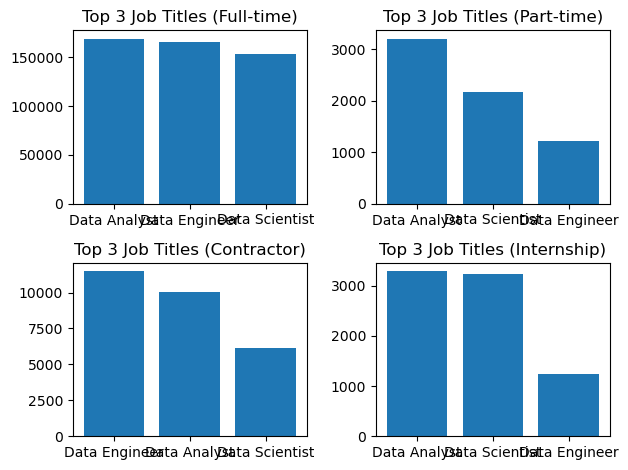

<Figure size 2000x600 with 0 Axes>

In [ ]:

fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()


In [ ]:
#Create a subplot with 3 rows and 1 column:
# In each subplot, plot a horizontal bar chart of the top 3 job skills by the number 
# of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).

# Use fig.tight_layout() to adjust the spacing between subplots and 
# invert_yaxis() to invert the y-axis in each subplot.

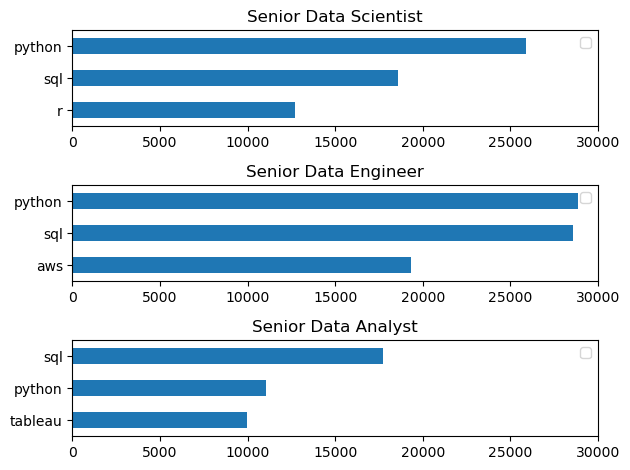

In [94]:

df_count_skills = df_exploded.groupby('job_title_short')['job_skills'].value_counts()
df_count_skills.sort_values(ascending=False, inplace=True)
df_count_skills=df_count_skills.reset_index()
senior_level = ['Senior Data Scientist', 'Senior Data Engineer', 'Senior Data Analyst']

fig, ax = plt.subplots(3, 1)
for i, role in enumerate(senior_level):
    df_skill_plot = df_count_skills[df_count_skills['job_title_short']==role].head(3)
    df_skill_plot.plot(kind='barh', x='job_skills', y='count', ax=ax[i], title=role)
    ax[i].invert_yaxis()
    ax[i].legend('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 30000)
fig.tight_layout()
plt.show()
